In [56]:
import facebook_scraper as fs
from facebook_scraper import get_group_info
from facebook_scraper import get_posts
import pandas as pd
import os
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import openai
from deep_translator import GoogleTranslator

In [4]:
#read cookies
cookie = 'cookies_data/religious_post.txt'
print(cookie)

cookies_data/religious_post.txt


In [5]:
#initialize the cookies
get_group_info("368809433220789", cookies= cookie)

/Users/rahadarmannabid/opt/anaconda3/envs/networkx_env/lib/python3.10/site-packages/facebook_scraper/facebook_scraper.py:912: UserWarning: Facebook says 'Unsupported Browser'
  warnings.warn(f"Facebook says 'Unsupported Browser'")


{'id': '368809433220789',
 'name': 'বুয়েটে আড়িপেতে শোনা',
 'type': 'Private group',
 'members': 22503,
 'about': 'বুয়েটে আড়িপেতে শোনা বা আড়িপাতা\n\nআড়িপাতা গ্রুপটি শুধু বুয়েটিয়ানদের জন্য এবং জামাত-শিবির মুক্ত। ডাটাবেইজে তথ্য দিয়ে অন্য বুয়েটিয়ানদের যোগ করা যাবে। তথ্য দেয়ার লিঙ্কঃ https://tinyurl.com/SubmitAripataDB\n\nনানা বিষয়ে নির্বাচিত অ্যাডমিন প্যানেলের সিদ্ধান্তই চূড়ান্ত। লেখা/মন্তব্য দেওয়ার জন্য কিছু নিয়মাবলী সংক্ষেপে নিচে দেয়া হলো। পূর্ণ নিয়মাবলীর জন্য আড়িপাতা ৬.০ দ্রষ্টব্য। নীতিমালা গ্রুপের ফাইলে দেয়া আছে।\n১। নিজের লেখা/মন্তব্য চলবে, কিছু শেয়ার করলে সাথে ৫০ শব্দের নিজস্ব ব্যাখ্যা দেওয়া উচিৎ। পোস্ট নিয়ন্ত্রণ ও অতঃপর অনুমোদন নেই, লেখা/মন্তব্যে তাই নিজস্ব বিবেচনা প্রয়োগ করুন।\n২। লেখা/মন্তব্য সম্পর্কে অভিযোগ জানিয়ে প্যানেলের সিদ্ধান্তের অপেক্ষা করুন। সিদ্ধান্ত পছন্দ না হলে যুক্তি দিন, পুনর্বিবেচনার আবেদন করুন।\n৩। আড়িপাতার লেখা/মন্তব্য/স্ক্রিনশট লেখকের/ প্যানেলের অনমুতি ছাড়া বাইরে দেওয়া কাম্য নয়।\n৪। আড়িপাতার ঘটনা নিয়ে আড়িপাতার বাইরে আক্রমণাত্মক লেখা/মন্তব্য/আচরণ কাম্য নয়।\n৫। বু

In [8]:
#getting all the post ids from this group, number of ids depends on the cookies and save it in a csv file
def scrape_facebook_group():
    i = 0
    posts = get_posts(group='368809433220789', cookies= cookie)
    with open('group_post_ids/list.txt', 'w') as f:
        header_title = 'post_id' + ","+ 'post_reactions' + ',' + "num_of_comments" +'\n'
        f.write(header_title)
        for post in posts:
            id_num= post.get('post_id')
            id_reactions = post.get('likes')
            comments_num= post.get("comments")
            entry_csv = str(id_num) + ',' + str(id_reactions) + ',' + str(comments_num)+ '\n'
            f.write(entry_csv)
            i += 1
            if i == 5:
                return

        

if __name__ == "__main__":
    scrape_facebook_group()

In [9]:
#convert the text file into csv file
read_file = pd.read_csv (r'group_post_ids/list.txt')
read_file.to_csv (r'group_post_ids/list.csv', index=None)

In [36]:
group_post_ids = pd.read_csv("group_post_ids/list.csv")
group_post_ids.sort_values(ascending= False, by='num_of_comments',inplace = True)
group_post_ids

,post_id,post_reactions,num_of_comments
3,5540681289366885,155,69
4,5554319294669751,58,22
0,5548099641958383,62,17
1,5554638077971206,119,17
2,5554742511294096,8,5


In [23]:
def extract_data_from_post(Token_NO):
    POST_ID = "https://www.facebook.com/groups/OverheardAtBUET/posts/"+ Token_NO +"/"
    MAX_COMMENTS = True

    gen = fs.get_posts(
        post_urls=[POST_ID],
        options={"comments": MAX_COMMENTS, "progress": True}
    )

    post = next(gen)
    comments = post['comments_full']

    File_NAME = Token_NO + ".csv"

    i= 0
    temp_data = [[]]

    temp_data[i].append(post['username']) 
    temp_data[i].append(post['post_text']) 

    for comment in comments:
        temp_data.append([])
        i +=1 
        temp_data[i].append(comment.get('commenter_name'))
        temp_data[i].append(comment.get('comment_text'))
        for reply in comment['replies']:
            temp_data[i].append(reply.get('commenter_name')) 
            temp_data[i].append(reply.get('comment_text'))
    File_loaction = 'raw_data_2/' + File_NAME
    temp_data_data_frame = pd.DataFrame(temp_data)
    temp_data_data_frame.to_csv(File_loaction, encoding='utf-8')

In [24]:
#create csv files of different post with comments
x, y = group_post_ids.shape
for i in range(x):
    extract_data_from_post(str(group_post_ids.iloc[i][0]))

  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]
  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]
  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]
  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]
  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]


In [128]:
def checking_length_of_reply(data):
    #plotting the reply length
    data = data.drop('Unnamed: 0', axis=1)
    not_null_values = data.notnull()
    not_null_values = not_null_values.T
    a, b = not_null_values.shape
    title = [*range(0,b)]
    not_null_values.columns = title
    not_null_values
    list_plot =[]
    for i in range(0, b):
        list_plot.append((not_null_values[i].value_counts()[True])/2)
    comment_number = [*range(0,b)] 
    plt.barh(comment_number,list_plot)
    plt.title('Number of Replies in Each Comment')
    plt.ylabel('Number of Replies in Each Comment')
    plt.xlabel('Comment Number')
    plt.show()


Files and directories in ' raw_data_2/ ' :
['5554638077971206.csv', '5540681289366885.csv', '5554319294669751.csv', '5548099641958383.csv', '5554742511294096.csv'] 



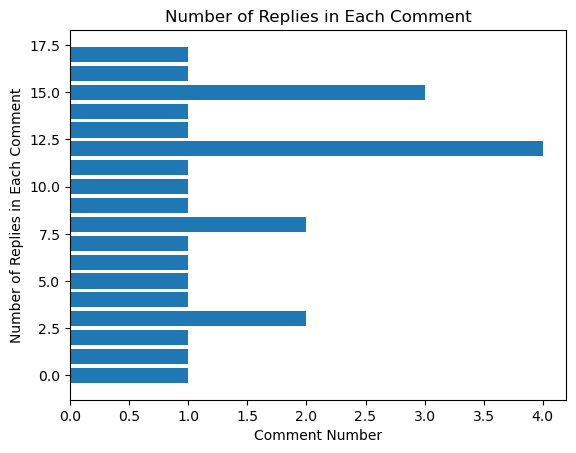

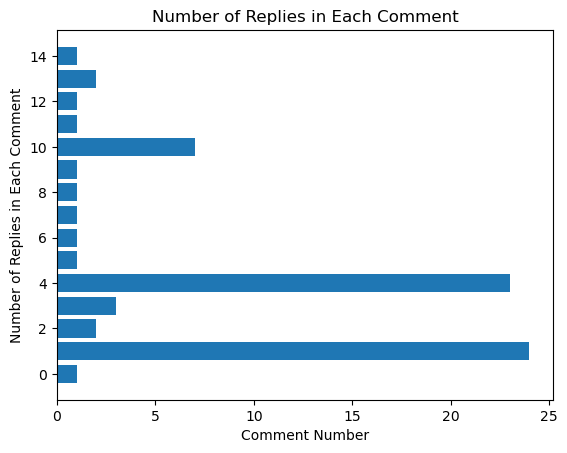

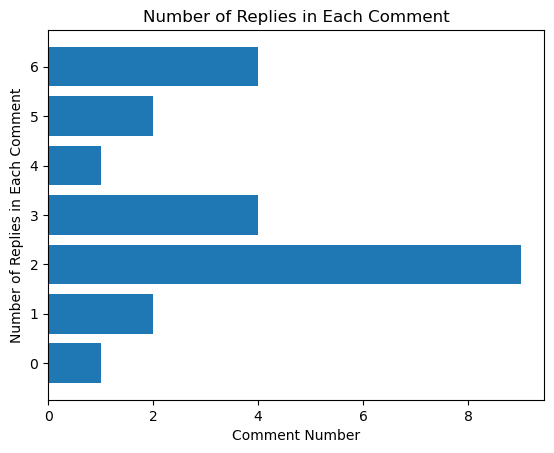

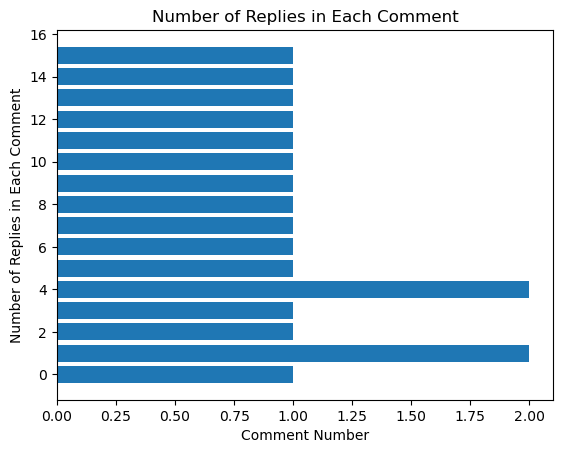

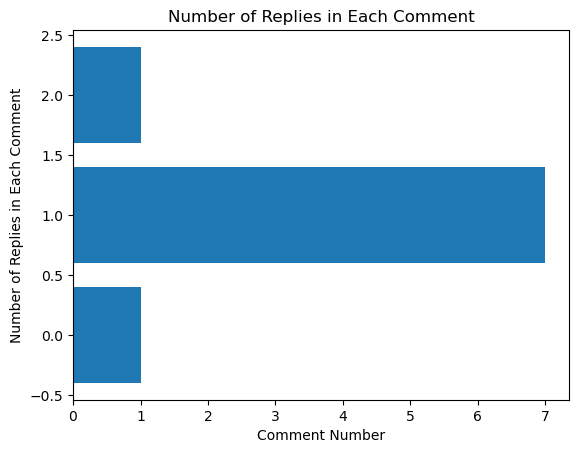

In [129]:
#read all the file names in the folder
path = "raw_data_2/"
dir_list = os.listdir(path) 
print("Files and directories in '", path, "' :")
print(dir_list, '\n')

#check all the comment reply length
for i in dir_list:
    data = pd.read_csv(path + i)
    checking_length_of_reply(data)
    
    

In [133]:
def user_database(Token_NO):
    POST_ID = "https://www.facebook.com/groups/OverheardAtBUET/posts/"+ Token_NO +"/"
    MAX_COMMENTS = True
    gen = fs.get_posts(
        post_urls=[POST_ID],
        options={"comments": MAX_COMMENTS, "progress": True}
    )

    post = next(gen)
    comments = post['comments_full']

    user_data = []

    if post['username'] not in user_data:
        user_data.append(post['username'])

    for comment in comments:
        if comment.get('commenter_name') not in user_data:
            user_data.append(comment.get('commenter_name'))
        for reply in comment['replies']:
            if reply.get('commenter_name') not in user_data:
                user_data.append(reply.get('commenter_name'))
    print(user_data)
    # user_data_data_frame = pd.DataFrame(user_data)
    #temp_data_data_frame.to_csv(File_NAME, encoding='utf-8')
    # user_data_data_frame

In [134]:

#read all the file names in the folder
path = "raw_data_2/"
dir_list = os.listdir(path) 
print("Files and directories in '", path, "' :")
print(dir_list, '\n')

#get all the user data
for i in dir_list:
    user_database(i.replace(".csv",""))

Files and directories in ' raw_data_2/ ' :
['5554638077971206.csv', '5540681289366885.csv', '5554319294669751.csv', '5548099641958383.csv', '5554742511294096.csv'] 



/Users/rahadarmannabid/opt/anaconda3/envs/networkx_env/lib/python3.10/site-packages/dateparser/freshness_date_parser.py:76: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  now = self.get_local_tz().localize(now)
  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]


['Aminul Islam Emon', 'Badsha Mondol', 'Riad Un Nabi', 'Auninda Mahbub', 'Palash Mustafiz', 'Kapil Mukhopadhyay', 'Tahmina Husna Tandra', 'Wahidur Rahman Rokon', 'Noor E Alam Siddique', 'Fuad Nur Taufique', 'Rezwanur Rahman', 'তসফিক ইসলাম', 'Kazi Nabil Nawshad', 'Reza Nishat', 'Jewel Julkernine', 'Krisnendu Roy', 'Jakaria Jalal', 'Nahian Bin Hossain', 'Ikram Efaz', 'Syed Gias Uddin', 'Mushfiq Rahman', 'Muhammad Ali Imam', 'Faruk Ahmed', 'Obaidul Islam Parvez', 'Depak Mallick', 'Obaidul Sadique Sujon']


  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]


['Sazzad Hossain', 'Kowsar Mahmud Pappu', 'Irfat Ishana', 'Sohaib Bin Musa', 'গোলাম রাব্বি', 'SM Sohelozzaman', 'Nuzhat Farah', 'Kamruz Z Khan', 'Aiman Mahmood', 'Rasel Aman', 'Ashraf Raheb', 'Amir Faysal', 'Zabed Akbar', 'Mohammed Khaled Mahmud', 'Riyan Hashem Jamy', 'Touhidul Islam Anik', 'Mehdi Hasan Shanto', 'Khaled Hussain', 'Saleh Ahmed', 'Bidhan Chowdhury', 'Zobayer Ahamed', 'Khan Mohammad Waliuzzaman', 'Saida Afrose', 'Rumki Sarkar', 'Syed Salaken', 'Didar Tarafder', 'Sultan Ahmed', 'Kapil Mukhopadhyay', 'Md Sabbir Hossain']


  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]


['Sayeed Ahammad', 'Khaled Hussain', 'Md. Mainul Hasan', 'Md Mahabub Hassan', 'Taoshif Tazwar Turzo', 'Fahim Faisal Khan Shapnil', 'Sudipta Roy', 'Sumit Mondal', 'Abhijeet Kar', 'Kwoshik Kumar', 'Amit Kumar Raut']


  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]


['Kowsar Mahmud Pappu', 'Jewel Julkernine', 'মাসুদ পারভেজ', 'Shahinuzzaman Arun', 'Munir Haque', 'Mazid UL Haque Tamim', 'Dipen Saha Jony', 'ফয়সাল মাহমুদ', 'Humyom Hossain Safir', 'Tazul Islam Mukut', 'Abu Bakar Siddique', 'Ayan Biswas', 'Shariat Rahman', 'Nayeema Nazneen Naz', 'Ahana Jyoti Ahmed', 'Abdul Khalek Kochi']


  0%|                                              | 0/1000000000.0 [00:00<?, ?it/s]


['Sudipta Roy', 'Md. Mainul Hasan', 'Sayeed Ahammad', 'Saikat Biswas', 'Gopal Bagchi', 'জাহাঙ্গীর আলম']
